# Eksperimen Text Preprocessing: Dataset Berita Detik

In [59]:
import json
from google.colab import drive
drive.mount('/content/drive')
file_path = "/content/drive/MyDrive/STKI-Project/Minggu2/1525136940000.detik-news.6420e5bc70.json"

# Baca JSON
with open(file_path, "r", encoding="utf-8") as f:
    data = json.load(f)

# Ambil isi teks dari key
if "content" in data:
    kalimat = data["content"]
elif "text" in data:
    kalimat = data["text"]
else:
    kalimat = str(data)

print("Output Kalimat Asli: ")
print(kalimat[:500], "...")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Output Kalimat Asli: 
Jakarta -
Wakil Gubernur DKI Jakarta Sandiaga Uno mengatakan relawan atau timses pada masa Pilkada 2017 diperbolehkan mendaftar seleksi direksi BUMD. Syaratnya, kata Sandi, harus profesional. "Boleh saja selama dia profesional. Tapi, begitu dia masuk, kan selama dia tidak berafiliasi dengan partai politik, dia bebas saja," kata Sandi di Balai Kota, Jakarta Pusat, Senin (30/4/2018). "Relawan timses banyak sekali. Relawan timses yang menyebut dirinya relawan. Karena kemarin 3,2 juta yang memilih A ...


# Case Folding: Lowercase

In [60]:
# Merubah format teks menjadi format huruf kecil semua

lower_case = kalimat.lower()
print(lower_case)

jakarta -
wakil gubernur dki jakarta sandiaga uno mengatakan relawan atau timses pada masa pilkada 2017 diperbolehkan mendaftar seleksi direksi bumd. syaratnya, kata sandi, harus profesional. "boleh saja selama dia profesional. tapi, begitu dia masuk, kan selama dia tidak berafiliasi dengan partai politik, dia bebas saja," kata sandi di balai kota, jakarta pusat, senin (30/4/2018). "relawan timses banyak sekali. relawan timses yang menyebut dirinya relawan. karena kemarin 3,2 juta yang memilih anies-sandi. dan kalau misalnya ada satu relawan untuk 100, itu kita bicara angkanya kan puluhan ribu, mungkin ratusan ribu. dan ini mungkin orang-orang yang baik dan memiliki kapasitas, kemarin dia membantu," lanjutnya. selain itu, sandi menyebut relawan yang mengikuti seleksi harus memiliki integritas. tak hanya itu, kata sandi, si calon anggota direksi bumd ini juga harus bertanggung jawab. "asalkan asesmennya lolos, asalkan dia betul-betul memiliki integritas, asalkan profesional, dan dia bis

# Case Folding: Removing Number, Punctuation, and Whitespace

In [61]:
import re
import string # Menghapus karakter kosong

remove_number = re.sub(r"\d+", "", lower_case) # Menghapus karakter angka
remove_punctuatuion = remove_number.translate(str.maketrans("", "", string.punctuation)) # Menghapus karakter tanda baca
clean_word = re.sub(r'\s+', ' ', remove_punctuatuion).strip() #Menghapus whitespace dan hasil akhir
print(clean_word[:500], "...")

jakarta wakil gubernur dki jakarta sandiaga uno mengatakan relawan atau timses pada masa pilkada diperbolehkan mendaftar seleksi direksi bumd syaratnya kata sandi harus profesional boleh saja selama dia profesional tapi begitu dia masuk kan selama dia tidak berafiliasi dengan partai politik dia bebas saja kata sandi di balai kota jakarta pusat senin relawan timses banyak sekali relawan timses yang menyebut dirinya relawan karena kemarin juta yang memilih aniessandi dan kalau misalnya ada satu re ...


# Tokenisasi

In [62]:
# Menggunakan library NLTK untuk memisahkan kata dalam sebuah kalimat.

import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('punkt_tab')

tokens = nltk.tokenize.word_tokenize(clean_word)
print(tokens[:15], "...")
print("Jumlah token keseluruhan:", len(tokens))

['jakarta', 'wakil', 'gubernur', 'dki', 'jakarta', 'sandiaga', 'uno', 'mengatakan', 'relawan', 'atau', 'timses', 'pada', 'masa', 'pilkada', 'diperbolehkan'] ...
Jumlah token keseluruhan: 248


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


# Frequency Distribution

In [63]:
# Menghitung frekuensi kemunculan setiap tokens(kata) dalam teks.

import string
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

freq_dist = nltk.FreqDist(tokens) #menghitung kemunculannya

print(freq_dist.most_common())

[('relawan', 7), ('dia', 7), ('dan', 7), ('direksi', 6), ('bumd', 6), ('yang', 6), ('sandi', 5), ('di', 5), ('itu', 5), ('harus', 4), ('ini', 4), ('memiliki', 4), ('jakarta', 3), ('dki', 3), ('timses', 3), ('seleksi', 3), ('kata', 3), ('profesional', 3), ('dengan', 3), ('kita', 3), ('integritas', 3), ('asalkan', 3), ('bisa', 3), ('luar', 3), ('global', 3), ('bersaing', 3), ('gubernur', 2), ('sandiaga', 2), ('pada', 2), ('mendaftar', 2), ('saja', 2), ('selama', 2), ('kan', 2), ('tidak', 2), ('menyebut', 2), ('karena', 2), ('kemarin', 2), ('ada', 2), ('ribu', 2), ('mungkin', 2), ('calon', 2), ('juga', 2), ('pergub', 2), ('intelektual', 2), ('negeri', 2), ('pasar', 2), ('dari', 2), ('akan', 2), ('wakil', 1), ('uno', 1), ('mengatakan', 1), ('atau', 1), ('masa', 1), ('pilkada', 1), ('diperbolehkan', 1), ('syaratnya', 1), ('boleh', 1), ('tapi', 1), ('begitu', 1), ('masuk', 1), ('berafiliasi', 1), ('partai', 1), ('politik', 1), ('bebas', 1), ('balai', 1), ('kota', 1), ('pusat', 1), ('senin', 

In [64]:
# Menampilkan 5 kata paling sering muncul
print("5 Kata yang Paling Sering Muncul:")
for word, freq in freq_dist.most_common(5):
    print(f"{word}: {freq}")

5 Kata yang Paling Sering Muncul:
relawan: 7
dia: 7
dan: 7
direksi: 6
bumd: 6


# Visualization of Distribution

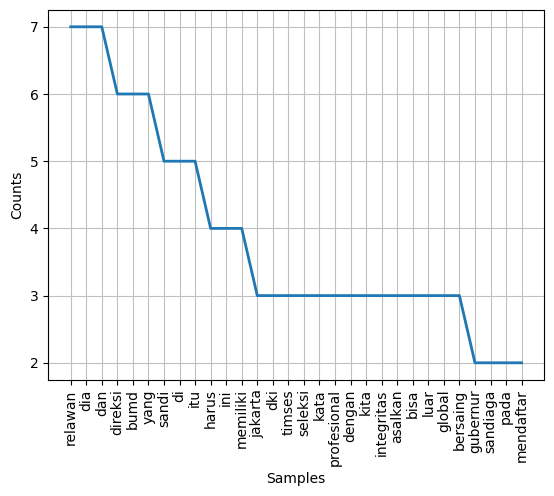

In [65]:
# Untuk menggambarkan frekuensi kemunculan setiap tokens dapat menggunakan library matplotlib pada Python.

import matplotlib.pyplot as plt

freq_dist.plot(30, cumulative=False)

plt.show()

# Stopword Removal

In [66]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from nltk.tokenize import word_tokenize
import string # Import string module

factory = StopWordRemoverFactory()
stopword_remover = factory.create_stop_word_remover() # Renamed variable from stopword to stopword_remover

text_filtered = stopword_remover.remove(clean_word) # Use the renamed variable
tokens = nltk.tokenize.word_tokenize(text_filtered)

print("Stopword Removal: ", text_filtered[:500], "...")
print("Token (30 pertama):", tokens[:30])
print("Jumlah token setelah filtering:", len(tokens))

Stopword Removal:  jakarta wakil gubernur dki jakarta sandiaga uno mengatakan relawan timses masa pilkada diperbolehkan mendaftar seleksi direksi bumd syaratnya kata sandi profesional selama profesional begitu masuk kan selama tidak berafiliasi partai politik bebas saja kata sandi balai kota jakarta pusat senin relawan timses banyak sekali relawan timses menyebut dirinya relawan kemarin juta memilih aniessandi kalau misalnya satu relawan bicara angkanya kan puluhan ribu mungkin ratusan ribu mungkin orangorang baik ...
Token (30 pertama): ['jakarta', 'wakil', 'gubernur', 'dki', 'jakarta', 'sandiaga', 'uno', 'mengatakan', 'relawan', 'timses', 'masa', 'pilkada', 'diperbolehkan', 'mendaftar', 'seleksi', 'direksi', 'bumd', 'syaratnya', 'kata', 'sandi', 'profesional', 'selama', 'profesional', 'begitu', 'masuk', 'kan', 'selama', 'tidak', 'berafiliasi', 'partai']
Jumlah token setelah filtering: 187


# Stemming

In [67]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

stemmed_tokens = [stemmer.stem(token) for token in tokens]

print("Token (30 pertama):", stemmed_tokens[:30])
print("Jumlah token setelah stemming:", len(stemmed_tokens))

Token (30 pertama): ['jakarta', 'wakil', 'gubernur', 'dki', 'jakarta', 'sandiaga', 'uno', 'kata', 'rawan', 'timses', 'masa', 'pilkada', 'boleh', 'daftar', 'seleksi', 'direksi', 'bumd', 'syarat', 'kata', 'sandi', 'profesional', 'lama', 'profesional', 'begitu', 'masuk', 'kan', 'lama', 'tidak', 'afiliasi', 'partai']
Jumlah token setelah stemming: 187


# Stemming: Nazief–Adriani Algorithm

In [68]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

stem_factory = StemmerFactory()
stemmer = stem_factory.create_stemmer()

stemmed_text = stemmer.stem(text_filtered)
stemmed_tokens = stemmed_text.split()

print("Stemmed Text: ", stemmed_text[:500], "...")
print("Token hasil stemming (30 pertama):", stemmed_tokens[:30])
print("Jumlah token setelah stemming:", len(stemmed_tokens))

Stemmed Text:  jakarta wakil gubernur dki jakarta sandiaga uno kata rawan timses masa pilkada boleh daftar seleksi direksi bumd syarat kata sandi profesional lama profesional begitu masuk kan lama tidak afiliasi partai politik bebas saja kata sandi balai kota jakarta pusat senin rawan timses banyak sekali rawan timses sebut diri rawan kemarin juta pilih aniessandi kalau misal satu rawan bicara angka kan puluh ribu mungkin ratus ribu mungkin orangorang baik milik kapasitas kemarin bantu lanjut sandi sebut rawan ...
Token hasil stemming (30 pertama): ['jakarta', 'wakil', 'gubernur', 'dki', 'jakarta', 'sandiaga', 'uno', 'kata', 'rawan', 'timses', 'masa', 'pilkada', 'boleh', 'daftar', 'seleksi', 'direksi', 'bumd', 'syarat', 'kata', 'sandi', 'profesional', 'lama', 'profesional', 'begitu', 'masuk', 'kan', 'lama', 'tidak', 'afiliasi', 'partai']
Jumlah token setelah stemming: 187
